In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
import scipy.stats as stats
import math
from math import sqrt
import seaborn as sns

%matplotlib inline

In [3]:
t = 200
mean = 0
varet = 1
repeat = 1000
alpha_value = [0.99, 0.95, 0.90, 0.80, 0.70]

In [1]:
def monte_carlo(t, mean, varet, repeat, alpha_value):
    olslist = []
    cilist = []
    test = []
    for i in range(len(alpha_value)):
        alpha = alpha_value[i]
        vare0 = 1/(1-alpha**2)

        for j in range(repeat):

            #(i) sampling
#             np.random.seed(j + i * repeat)
            e0 = np.random.normal(mean, vare0, 1)
            y0 = e0
            et = np.random.normal(mean, varet, t)

            ylist = []    
            for k in range(t):
                yt = alpha * y0 + et[k]
                ylist.append(y0)
                y0 =yt
            yt = np.asarray(ylist[ : -1]).reshape(-1, 1)
            yt_1 = np.asarray(ylist[ 1 : ]).reshape(-1, 1)

            #(ii)regression    
            reg = sm.OLS(yt, yt_1).fit()
            ahat = reg.params 
            #(iii)confidence interval
#             if (reg.conf_int()[0, 0] < alpha and reg.conf_int()[0, 1] > alpha):
            if ((ahat - 1.96 * reg.bse) < alpha and (ahat + 1.96 * reg.bse) > alpha):
                inci = 1
            else :
                inci = 0
            bh = ((yt_1 - yt_1.mean())*(yt - yt.mean())).sum()/(((yt_1 - yt_1.mean())**2).sum())

            olslist.append(ahat)
            cilist.append(inci)
            
    ahat = np.asarray(olslist).reshape(len(alpha_value), repeat)
    inci = np.asarray(cilist).reshape(len(alpha_value), repeat)

    
    
    return ahat, inci



In [9]:
def est_plot(variable, alpha):
    for i in range(len(alpha)):
        sns.distplot(variable[i, ], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = alpha[i])

In [4]:
ahat, inci =  monte_carlo(t, mean, varet, repeat, alpha_value)

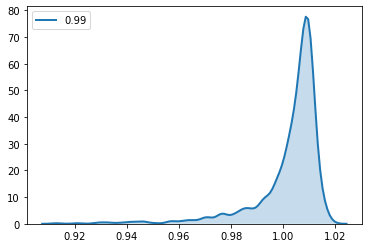

In [83]:
sns.distplot(ahat[0, ], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = 0.99)

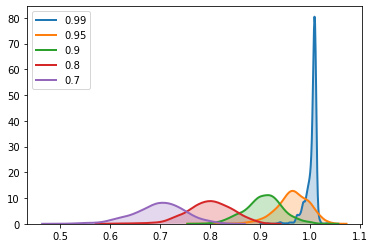

In [10]:
#ploting ahat for visual checking
est_plot(ahat, alpha_value)

1(a) in handwritten answer sheet
# **ans1(b)**

In [8]:
def property(variable, truepar_list):
    for i in range(len(truepar_list)):
        truepar = truepar_list[i]
        print("alpha = " + str(truepar ) )
        mean = variable[i, ].mean()
        std = variable[i, ].std()
        mse = np.square(variable[i, ] - truepar).sum() / len(variable[i, ])
        print("mean, std, mse = %f, %f, %f"% (mean, std, mse) )
       
property(ahat, alpha_value)

alpha = 0.99
mean, std, mse = 1.002687, 0.011676, 0.000297
alpha = 0.95
mean, std, mse = 0.964820, 0.032980, 0.001307
alpha = 0.9
mean, std, mse = 0.907031, 0.037025, 0.001420
alpha = 0.8
mean, std, mse = 0.797919, 0.045502, 0.002075
alpha = 0.7
mean, std, mse = 0.697323, 0.050940, 0.002602


# **ans1(c)**

In [7]:
def ci_coverage(variable, alpha, in_judge):
    for i in range(len(alpha)):
        print("alpha = " + str(alpha[i]) )
        ci = sm.stats.DescrStatsW(variable[i, ]).tconfint_mean()
        print(ci)
        pr = in_judge[i, ].mean()
        print("coverage probabilities = %f" %pr)
ci_coverage(ahat, alpha_value, inci)

alpha = 0.99
(1.001961798038791, 1.0034116125701933)
coverage probabilities = 0.297000
alpha = 0.95
(0.9627723282552739, 0.9668674623793806)
coverage probabilities = 0.693000
alpha = 0.9
(0.9047320723126044, 0.9093295177194716)
coverage probabilities = 0.878000
alpha = 0.8
(0.7950938932212713, 0.8007439377675271)
coverage probabilities = 0.934000
alpha = 0.7
(0.6941603600531803, 0.7004856415278193)
coverage probabilities = 0.942000


# **ans1(d)**

Since yt is correlated with its dependent variable yt-1, we know that in small sample it's a biased estimator. However, it's a stationary sequence with uncorrelated error term, which says it's a consistent estimator. Therefore, we can expect it to converge to true parameter as sample increase.

In [89]:
t = 800
ahat, inci =  monte_carlo(t, mean, varet, repeat, alpha_value)



alpha = 0.99
mean, std, mse = 0.999582, 0.008096, 0.000157
alpha = 0.95
mean, std, mse = 0.956492, 0.015326, 0.000277
alpha = 0.9
mean, std, mse = 0.902129, 0.016982, 0.000293
alpha = 0.8
mean, std, mse = 0.799967, 0.021667, 0.000469
alpha = 0.7
mean, std, mse = 0.699131, 0.025705, 0.000662


alpha = 0.99
(0.999423302134124, 0.9997406956201439)
coverage probabilities = 0.360700
alpha = 0.95
(0.956191675381302, 0.9567925620450417)
coverage probabilities = 0.798000
alpha = 0.9
(0.901795700710451, 0.9024615151654792)
coverage probabilities = 0.919300
alpha = 0.8
(0.7995423545661147, 0.8003918499580385)
coverage probabilities = 0.944600
alpha = 0.7
(0.6986270102469161, 0.6996348128068632)
coverage probabilities = 0.946000


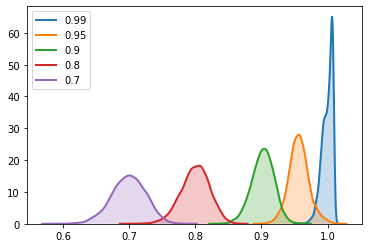

In [90]:
est_plot(ahat, alpha_value)
print("\n")
property(ahat, alpha_value)
print("\n")
ci_coverage(ahat, alpha_value, inci)